# Part 2
#### Create a plot that displays the correlation between the correct key byte and the number of traces, ranging from 10 to 100 in increments of 10, for all 16 bytes of the key. 

There are two functions available: "plot2_all()" to plot the correlation of all key guesses for all key bytes, and "plot2(csv_file)" to plot the correlation of all key guesses for a specific key byte, using data from the provided correlation csv file.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
pathForWave10=  '.'+'/test/wave10/output/'
pathForWave=  '.'+'/test/wave'
def plot2_all():
    f, ax = plt.subplots(4,4)
    
    for i in range(16):
        axis = ax[i//4,i%4]
        # initialise with max corr values for each byte from corr data w 10 traces 
        csv_file = 'BruteForceCorrelation_'+str(i+1)+'.csv'
        max_corr_df = pd.DataFrame(pd.read_csv(pathForWave10+csv_file, header=None).max(axis=1), columns=[10])
        
        # concat max corr values for each byte from corr data w 20 to 100 traces
        for j in range(9):
            num = (j+2)*10
            full_path = pathForWave +str(num)+'/output/'+csv_file
            temp_df = pd.DataFrame(pd.read_csv(full_path, header=None).max(axis=1), columns=[num])
            max_corr_df = pd.concat([max_corr_df, temp_df], axis=1)
        max_corr_df = max_corr_df.transpose()
        
        # get highest corr key value
        maxCorr = max_corr_df.columns[(max_corr_df.iloc[-1] == max_corr_df.iloc[-1].max())].tolist()[0]
        
        # plot        
        max_corr_df.plot(color='lightgrey',legend=None, ax=axis)
        axis.get_lines()[maxCorr].set(color='red', linewidth=1.5,zorder=1000)
        #axis.text(90, max_corr_df.iloc[-1,maxCorr]-0.05, 'Key:'+str(hex(int(maxCorr))), fontdict=None, withdash=False)
        
        axis.set_title('Key Byte ' + str(i+1) + ': '+str(hex(int(maxCorr))))
        axis.set_xlabel('No. of Traces')
        axis.set_ylabel('Correlation')
        
        plt.tight_layout()  
        fig = axis.get_figure()
        fig.set_size_inches(18.5, 10.5)

In [27]:
def plot2_pretty(csv_file):
    # initialise with max corr values for each byte from corr data w 10 traces 
    max_corr_df = pd.DataFrame(pd.read_csv(pathForWave10+ 'BruteForceCorrelation_1.csv', header=None).max(axis=1), columns=[10])
    
    # concat max corr values for each byte from corr data with 20 to 100 traces
    for i in range(9):
        num = (i+2)*10
        full_path = pathForWave +str(num)+'/output/'+csv_file
        temp_df = pd.DataFrame(pd.read_csv(full_path, header=None).max(axis=1), columns=[num])
        max_corr_df = pd.concat([max_corr_df, temp_df], axis=1)
    max_corr_df = max_corr_df.transpose()
    
    # get key byte number
    byte_num = csv_file[12:len(csv_file)-4]
    
    # get highest corr key value
    maxCorr = max_corr_df.columns[(max_corr_df.iloc[-1] == max_corr_df.iloc[-1].max())].tolist()[0]
    
    # plot
    plot = max_corr_df.plot(color='lightgray', legend=None)
    plot.get_lines()[maxCorr].set(color='red', linewidth=1.5,zorder=1000)
    plot.text(90, max_corr_df.iloc[-1,maxCorr]-0.05, 'Key:'+str(hex(int(maxCorr))), fontdict=None) 
    
    plot.set_title('Key Byte ' + byte_num + ': '+str(hex(int(maxCorr))))
    plot.set_xlabel('No. of Traces')
    plot.set_ylabel('Correlation')  

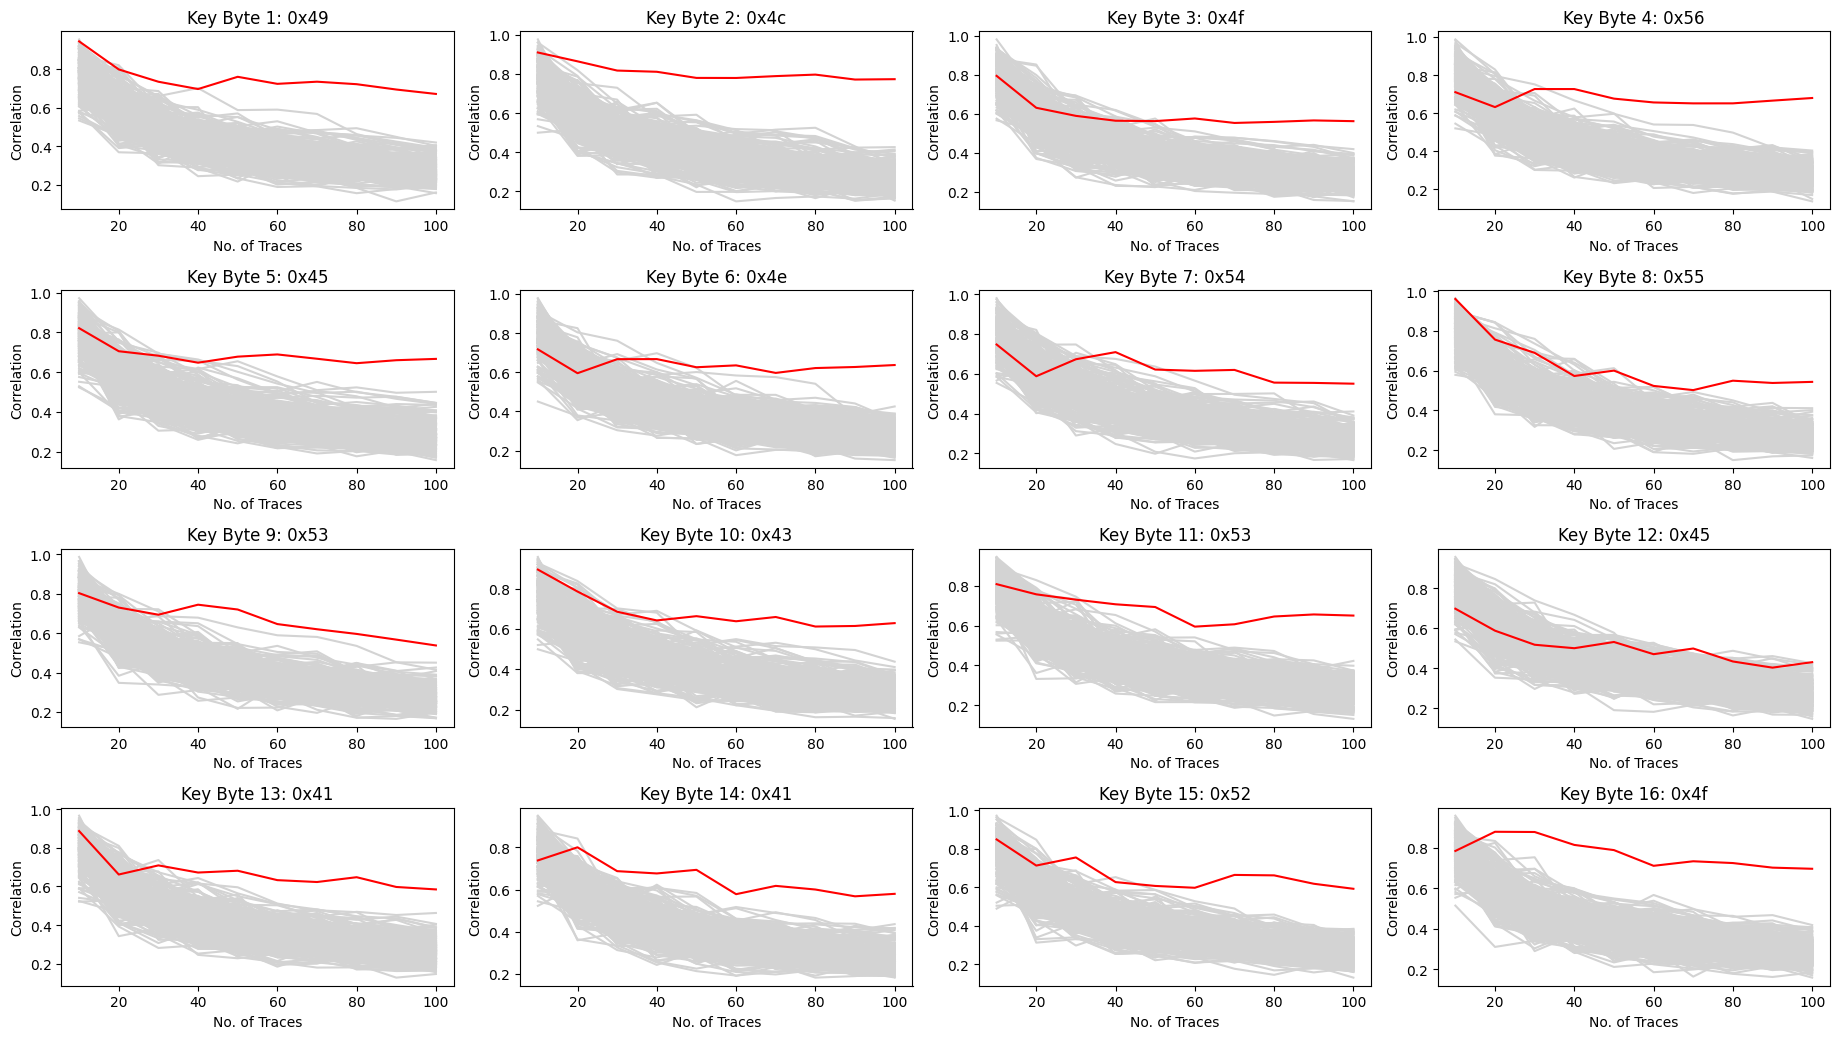

In [28]:
plot2_all()

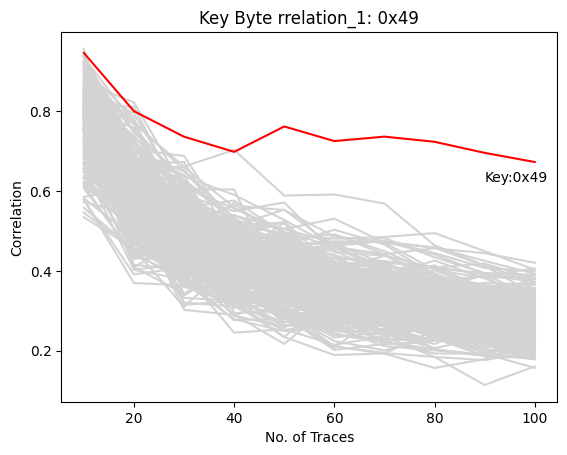

In [29]:
plot2_pretty('BruteForceCorrelation_1.csv')
